In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import json

# Sample JSON Data (Replace this string with your file content or load it from a file)
# Path to your JSON file
file_path = ('tree_build-24-04-26,01:25.json')  # Replace 'path_to_your_file.json' with your actual file path

m_max_str = '$M_{max}$'
plt.style.use('classic')

# Load JSON data from file
with open(file_path, 'r') as file:
    data_dict = json.load(file)

# Load data into Python Dictionary

# Convert to DataFrame
df = pd.DataFrame(data_dict['benchmarks'])
# filter only run_type == aggregate
df = df.loc[df['run_type'] == "aggregate"]
df["number_points"] = df["name"].str.extract(r'/(\d+)/', expand=False)
df["number_points"] = (df["number_points"]).fillna(0).astype(int)
df["M_max"] = df["name"].str.extract(r'/\d+/(\d+)')
df["M_max"] = (df["M_max"]).fillna(0).astype(int)

df['real_time'] = df['real_time'] / (10 ** 9)

df_mean = df.loc[df['name'].str.endswith("mean")]
df_median = df.loc[df['name'].str.endswith("median")]

df_mean

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,...,Time_voro(ns),nodes,aggregate_name,aggregate_unit,cpu_coefficient,real_coefficient,big_o,rms,number_points,M_max
30,treebuild_randompoints/100/8_mean,0,0,treebuild_randompoints/100/8,aggregate,30,NaN,1,30.0,0.205455,...,8.414357e+07,3.008000e+02,mean,time,NaN,NaN,NaN,NaN,100,8
64,treebuild_randompoints/100/16_mean,0,1,treebuild_randompoints/100/16,aggregate,30,NaN,1,30.0,0.218371,...,8.458239e+07,7.873333e+01,mean,time,NaN,NaN,NaN,NaN,100,16
98,treebuild_randompoints/100/32_mean,0,2,treebuild_randompoints/100/32,aggregate,30,NaN,1,30.0,0.212502,...,8.603360e+07,1.433333e+01,mean,time,NaN,NaN,NaN,NaN,100,32
132,treebuild_randompoints/100/64_mean,0,3,treebuild_randompoints/100/64,aggregate,30,NaN,1,30.0,0.204517,...,8.293014e+07,9.000000e+00,mean,time,NaN,NaN,NaN,NaN,100,64
166,treebuild_randompoints/100/96_mean,0,4,treebuild_randompoints/100/96,aggregate,30,NaN,1,30.0,0.206820,...,8.571225e+07,9.000000e+00,mean,time,NaN,NaN,NaN,NaN,100,96
200,treebuild_randompoints/100/128_mean,0,5,treebuild_randompoints/100/128,aggregate,30,NaN,1,30.0,0.206662,...,8.504314e+07,9.000000e+00,mean,time,NaN,NaN,NaN,NaN,100,128
234,treebuild_randompoints/100/256_mean,0,6,treebuild_randompoints/100/256,aggregate,30,NaN,1,30.0,0.207184,...,8.458719e+07,9.000000e+00,mean,time,NaN,NaN,NaN,NaN,100,256
268,treebuild_randompoints/1000/8_mean,0,7,treebuild_randompoints/1000/8,aggregate,30,NaN,1,30.0,0.305338,...,1.208853e+08,4.045167e+03,mean,time,NaN,NaN,NaN,NaN,1000,8
302,treebuild_randompoints/1000/16_mean,0,8,treebuild_randompoints/1000/16,aggregate,30,NaN,1,30.0,0.377337,...,1.244405e+08,1.007500e+03,mean,time,NaN,NaN,NaN,NaN,1000,16
336,treebuild_randompoints/1000/32_mean,0,9,treebuild_randompoints/1000/32,aggregate,30,NaN,1,30.0,0.386915,...,1.234187e+08,5.018000e+02,mean,time,NaN,NaN,NaN,NaN,1000,32


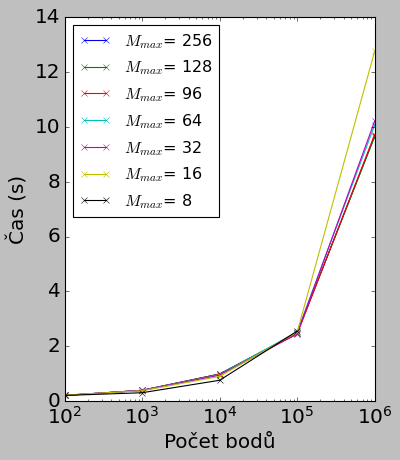

In [109]:

fig, ax = plt.subplots(figsize=(5,6 ))

m_max_values = sorted(df_mean['M_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_mean.loc[df_mean['M_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['number_points'], tmp_df['real_time'], '-x', label=f"{m_max_str}= {i}")

ax.set_ylabel('Čas (s)', fontsize=18)
# ax.set_title('Čas výpočtu by M_max and Number of Points')
ax.set_xticks(df_mean['number_points'].unique())  # Nastaví ticks na ose X
ax.set_xlabel('Počet bodů', fontsize=18)
ax.set_xscale('log')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


ax.legend(loc='upper left')
plt.savefig('benchmark_builtime_points_Mmax.pdf', bbox_inches='tight')


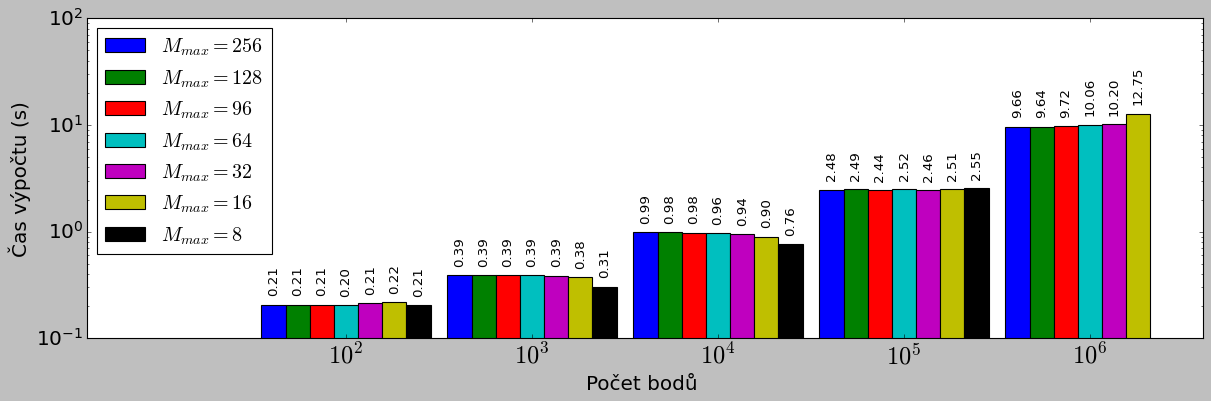

In [114]:
fig, ax = plt.subplots(figsize=(18, 5))

m_max_str = '$M_{max}$'


def to_scientific_latex(number):
    """
    Převede číslo na LaTeXový vědecký formát.

    Args:
    number (int or float): Číslo k převedení.

    Returns:
    str: Číslo ve formátu LaTeX $10^x$.
    """
    if number == 0:
        return "$0$"

    exponent = int(np.floor(np.log10(abs(number))))
    base = number / (10 ** exponent)

    # Případ, kdy základ je 10, což znamená že číslo je přesně 10^exponent
    if base == 10:
        return f"$10^{{{exponent + 1}}}$"

    # Zobrazíme jako celé číslo, pokud je základ celočíselně roven samotnému základu
    if base == int(base):
        base = int(base)

    # Když základ je 1, zobrazujeme pouze mocninu desítky
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${{ {base} \\times 10^{{{exponent}}} }}$"


# Get unique M_max values and sort them if needed
m_max_values = sorted(df_mean['M_max'].unique(), reverse=True)
width = 0.13  # Width of the bars

# Determine the number of unique number_points, assumed sorted
unique_points = sorted(df_mean['number_points'].unique())
n_groups = len(unique_points)

# Create an index array for the x-axis
index = np.arange(n_groups)

for i, m_max in enumerate(m_max_values):
    # Filter the dataframe for each M_max
    tmp_df = df_mean[df_mean['M_max'] == m_max]

    if (len(tmp_df['real_time']) == 4):
        bars = ax.bar((index + i * width)[:4], tmp_df['real_time'], width, label=f"{m_max_str}$={m_max}$")
        plt.bar_label(bars, rotation=90, padding=8, fmt="{:,.2f}")
    else:
        bars = ax.bar((index + i * width), tmp_df['real_time'], width, label=f"{m_max_str}$={m_max}$")
        plt.bar_label(bars, rotation=90, padding=8, fmt="{:,.2f}",)

ax.set_xlabel('Počet bodů ', fontsize=18)
ax.set_ylabel('Čas výpočtu (s)', fontsize=18)
# ax.set_title('Comparison of Mean Times for Different M_max Values')
ax.set_xticks(index + width / 2 * (len(m_max_values) - 1))
asdasd = [to_scientific_latex(i) for i in unique_points]
ax.set_xticklabels(asdasd, rotation=0)
ax.legend(loc='upper left', fontsize=18)

ax.set_yscale('log')

plt.yticks(fontsize=18)
plt.xticks(fontsize=22)

plt.savefig('benchmark_builtime_points_Mmax_bar.pdf', bbox_inches='tight')


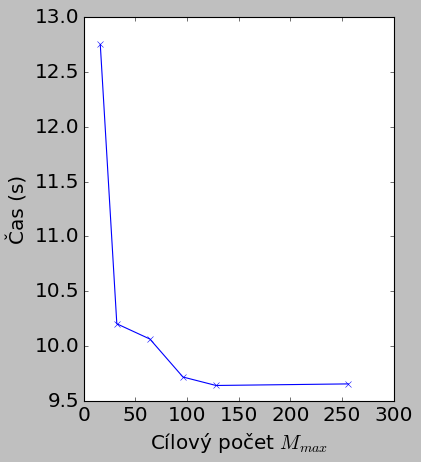

In [111]:
fig, ax = plt.subplots(figsize=(5,6 ))

# Get unique M_max values and sort them if needed
max_values = max(df_mean['number_points'].unique())

tmp_df = df_mean[df_mean['number_points'] == max_values]

ax.plot(tmp_df['M_max'], tmp_df['real_time'], '-x')

ax.set_xlabel('Cílový počet $M_{max}$',  fontsize=18)
ax.set_ylabel('Čas (s)',  fontsize=18)
# ax.set_title('Doba potřebná pro vypočtení struktry ve pro různá $M_{max}$')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig('benchmark_builtime_points_highest.pdf', bbox_inches='tight')

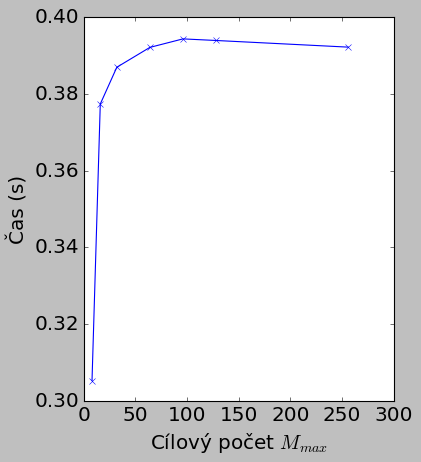

In [112]:
fig, ax = plt.subplots(figsize=(5,6 ))

# Get unique M_max values and sort them if needed
max_values = (df_mean['number_points'].unique())[1]

tmp_df = df_mean[df_mean['number_points'] == max_values]

ax.plot(tmp_df['M_max'], tmp_df['real_time'], '-x')

ax.set_xlabel('Cílový počet $M_{max}$',  fontsize=18)
ax.set_ylabel('Čas (s)',  fontsize=18)
# ax.set_title('Doba potřebná pro vypočtení struktry ve pro různá $M_{max}$')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig('benchmark_builtime_points_lowest.pdf', bbox_inches='tight')

/tmp/ipykernel_25751/119544293.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,10**8])


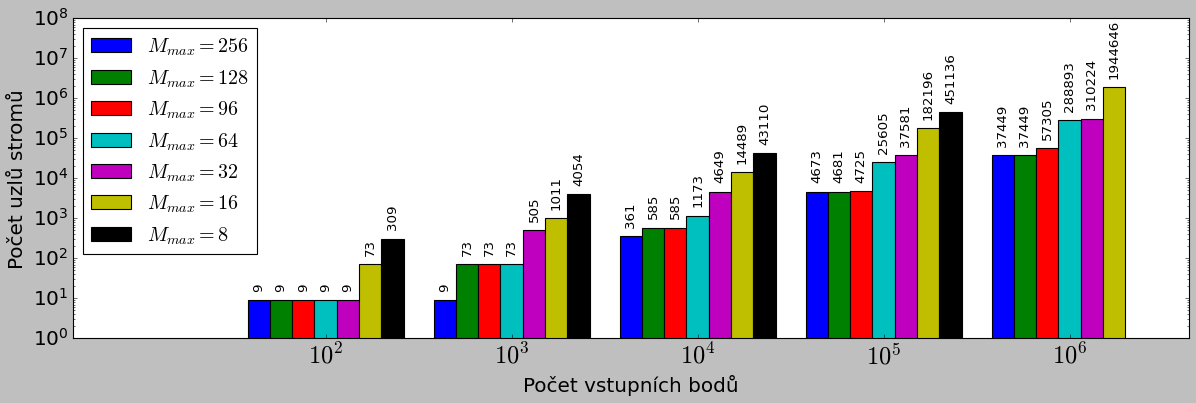

In [115]:
fig, ax = plt.subplots(figsize=(18, 5))

# Get unique M_max values and sort them if needed
m_max_values = sorted(df_median['M_max'].unique(), reverse=True)
width = 0.12  # Width of the bars

# Determine the number of unique number_points, assumed sorted
unique_points = sorted(df_median['number_points'].unique())
n_groups = len(unique_points)

# Create an index array for the x-axis
index = np.arange(n_groups)

for i, m_max in enumerate(m_max_values):
    # Filter the dataframe for each M_max
    tmp_df = df_median[df_median['M_max'] == m_max]

    # Align bars side by side by shifting the x-axis index
    if (len(tmp_df['real_time']) == 4):
        bars = ax.bar((index + i * width)[:4], tmp_df['nodes'], width, label=f"{m_max_str}$={m_max}$")
    else:
        bars = ax.bar(index + i * width, tmp_df['nodes'], width, label=f"{m_max_str}$={m_max}$")
        
    plt.bar_label(bars, rotation=90, padding=8, fmt="{:.0f}",)


ax.set_ylabel('Počet uzlů stromů', fontsize=18)
ax.set_xlabel('Počet vstupních bodů', fontsize=18)
ax.set_xticks(index + width / 2 * (len(m_max_values) - 1))

ax.set_xticklabels(unique_points, rotation=45)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=18)

asdasd = [to_scientific_latex(i) for i in unique_points]
ax.set_xticklabels(asdasd, rotation=0)

ax.set_ylim([0,10**8])

plt.yticks(fontsize=18)
plt.xticks(fontsize=22)

plt.savefig('benchmark_median_points_memory.pdf',  bbox_inches='tight')
